<a href="https://colab.research.google.com/github/KyleHaggin/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/Kyle_Haggin_LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [0]:
#import important libraries
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [0]:
#load income data
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
#load lifespan data
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
#load population data
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
#load entities data
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
#load convepts data
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [0]:
#check that all data is loaded
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [0]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [0]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [0]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [0]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


In [0]:
#merge the data
print(income.shape)
print(lifespan.shape)


(46513, 3)
(44370, 3)


In [0]:
#Merge using default
df = pd.merge(income, lifespan)
print(df.shape)

(40437, 4)


In [0]:
#merge as per above with specifying the parameters
df = pd.merge(income, lifespan, on = ['geo', 'time'], how = 'inner')
print(df.shape)

df.head()

(40437, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [0]:
df = pd.merge(df, population)
print(df.shape)
df.head()

(40437, 5)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [0]:
entities['world_6region'].value_counts()

europe_central_asia         77
america                     53
sub_saharan_africa          53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [0]:
entities['world_4region'].value_counts()

asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [0]:
entity_columns_to_keep = ['country', 'name', 'world_4region', 'world_6region']

entities = entities[entity_columns_to_keep]

entities.head()

,country,name,world_4region,world_6region
0,abkh,Abkhazia,europe,europe_central_asia
1,abw,Aruba,americas,america
2,afg,Afghanistan,asia,south_asia
3,ago,Angola,africa,sub_saharan_africa
4,aia,Anguilla,americas,america


In [0]:
merged = pd.merge(df, entities, left_on = 'geo', right_on = 'country')

merged.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [0]:
merged = merged.drop('geo', axis  ='columns')
merged.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region
0,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [0]:
merged = merged.rename(columns = {
    'country': 'country_code',
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': '6region',
    'world_4region': '4region'
})

merged.head()

,year,income,lifespan,population,country_code,country,4region,6region
0,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [0]:
#explore the data
merged.dtypes

year              int64
income            int64
lifespan        float64
population        int64
country_code     object
country          object
4region          object
6region          object
dtype: object

In [0]:
merged.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [0]:
merged.describe(exclude = 'number')

,country_code,country,4region,6region
count,40437,40437,40437,40437
unique,187,187,4,6
top,svk,Afghanistan,africa,europe_central_asia
freq,219,219,11826,10778


In [0]:
merged.country.unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [0]:
usa = merged[merged.country == 'United States']
usa.head()

,year,income,lifespan,population,country_code,country,4region,6region
38028,1800,2127,39.41,6801854,usa,United States,americas,america
38029,1801,2167,39.41,6933517,usa,United States,americas,america
38030,1802,2202,39.41,7067728,usa,United States,americas,america
38031,1803,2166,39.41,7204538,usa,United States,americas,america
38032,1804,2165,39.41,7343995,usa,United States,americas,america


In [0]:
usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country_code,country,4region,6region
38046,1818,2258,39.41,9879049,usa,United States,americas,america
38146,1918,9371,47.18,106721812,usa,United States,americas,america
38246,2018,54898,79.14,326766748,usa,United States,americas,america


In [0]:
china = merged[merged.country == 'China']
china[china.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country_code,country,4region,6region
6854,1818,985,32.00,374161494,chn,China,asia,east_asia_pacific
6954,1918,989,22.13,462444535,chn,China,asia,east_asia_pacific
7054,2018,16018,76.92,1415045928,chn,China,asia,east_asia_pacific


In [0]:
#plot visulaization
import seaborn as sns

now = merged[merged.year == 2018]

now.head()

,year,income,lifespan,population,country_code,country,4region,6region
218,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia
437,2018,5846,65.19,30774205,ago,Angola,africa,sub_saharan_africa
656,2018,12424,78.01,2934363,alb,Albania,europe,europe_central_asia
922,2018,68231,76.89,9541615,are,United Arab Emirates,asia,middle_east_north_africa
1141,2018,18942,76.97,44688864,arg,Argentina,americas,america


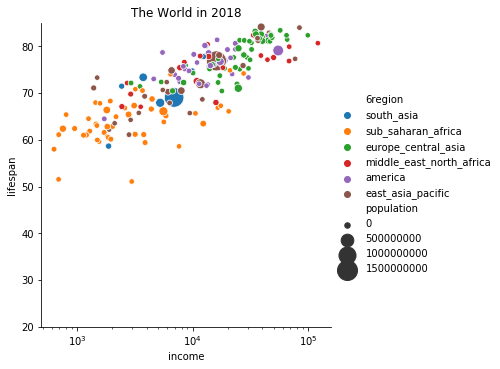

In [0]:
sns.relplot(x = 'income', y = 'lifespan', hue = '6region', size = 'population', sizes = (30, 400), data = now)
plt.xscale('log')
plt.ylim(20, 85)
plt.title('The World in 2018')
plt.show()

In [0]:
# Analyze outliers
now.sort_values('income', ascending = False)

,year,income,lifespan,population,country_code,country,4region,6region
30362,2018,121033,80.71,2694849,qat,Qatar,asia,middle_east_north_africa
22212,2018,99034,82.39,590321,lux,Luxembourg,europe,europe_central_asia
31895,2018,83888,84.03,5791901,sgp,Singapore,asia,east_asia_pacific
5521,2018,76943,77.36,434076,brn,Brunei,asia,east_asia_pacific
20241,2018,68359,79.96,4197128,kwt,Kuwait,asia,middle_east_north_africa
922,2018,68231,76.89,9541615,are,United Arab Emirates,asia,middle_east_north_africa
16956,2018,65622,81.49,4803748,irl,Ireland,europe,europe_central_asia
27296,2018,64846,82.39,5353363,nor,Norway,europe,europe_central_asia
6616,2018,57133,83.45,8544034,che,Switzerland,europe,europe_central_asia
38246,2018,54898,79.14,326766748,usa,United States,americas,america


In [0]:
now_qatar = now[now.country == 'Qatar']
now_qatar.head()

,year,income,lifespan,population,country_code,country,4region,6region
30362,2018,121033,80.71,2694849,qat,Qatar,asia,middle_east_north_africa


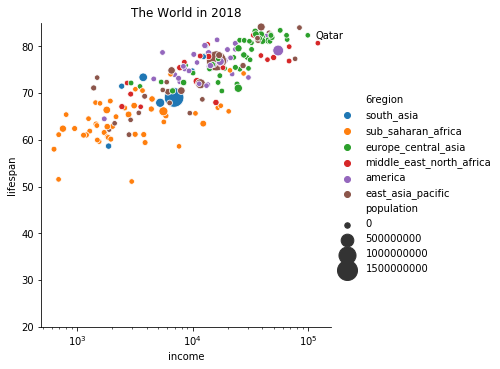

In [0]:
sns.relplot(x='income', y='lifespan', hue='6region', size='population', sizes=(30, 400), data=now)
plt.xscale('log')
plt.ylim(20, 85)
plt.title('The World in 2018')
plt.text(x=now_qatar.income-5000, y=now_qatar.lifespan+1, s='Qatar')
plt.show()

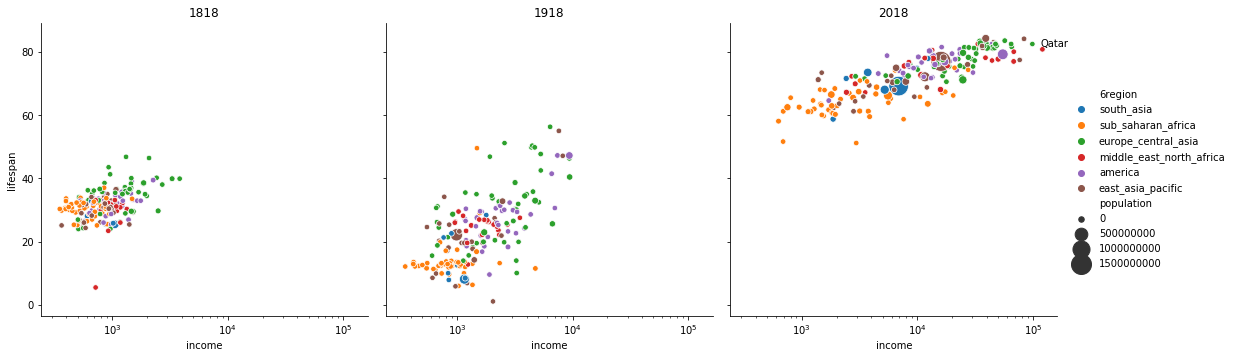

In [0]:
#plot multiple years

years = [1818, 1918, 2018]

centuries = merged[merged.year.isin(years)]

fig = sns.relplot(x = 'income', y = 'lifespan', hue = '6region', size = 'population', sizes = (30, 400), col = 'year', data = centuries)

plt.xscale('log')
plt.text(x = now_qatar.income-5000, y = now_qatar.lifespan+1, s = 'Qatar')

#Set the titles on the individual axes
axes = fig.axes.flatten()
axes[0].set_title('1818')
axes[1].set_title('1918')
axes[2].set_title('2018')

plt.show()

In [0]:
year = [1918, 1938, 1978, 1998, 2018]

decades = merged[merged.year.isin(year)]

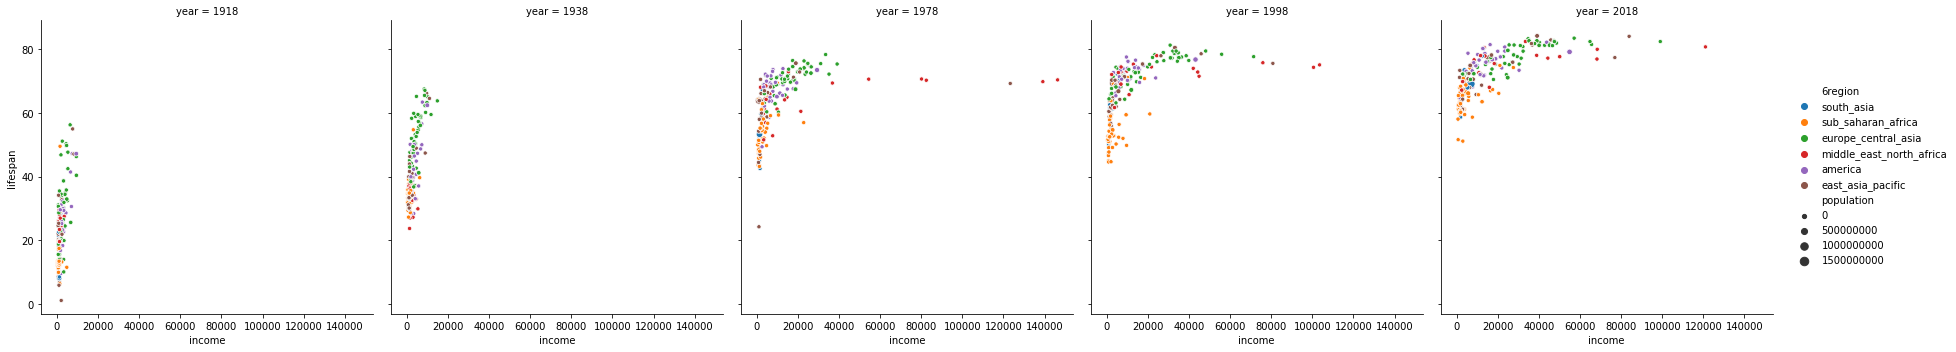

In [0]:
sns.relplot(x='income', y='lifespan', hue='6region', size='population', col='year', data=decades)
plt.show()

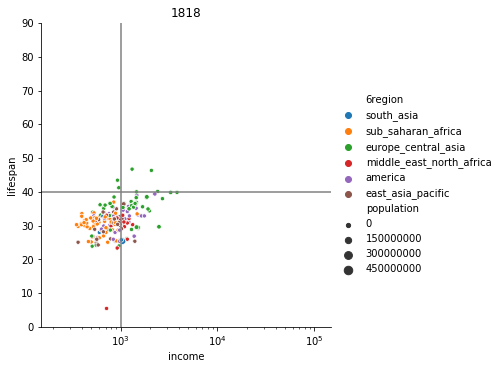

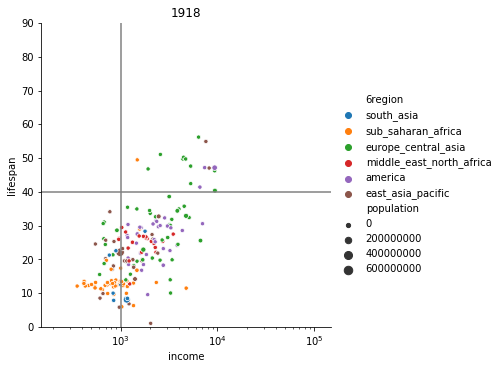

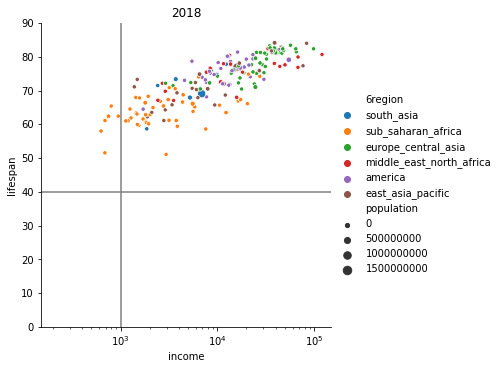

In [0]:
for year in years:
  sns.relplot(x='income', y='lifespan', hue='6region', size='population', data=merged[merged.year==year])
  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((0, 90))
  plt.title(year)
  plt.axvline(x=1000, color='grey')
  plt.axhline(y=40, color='grey')

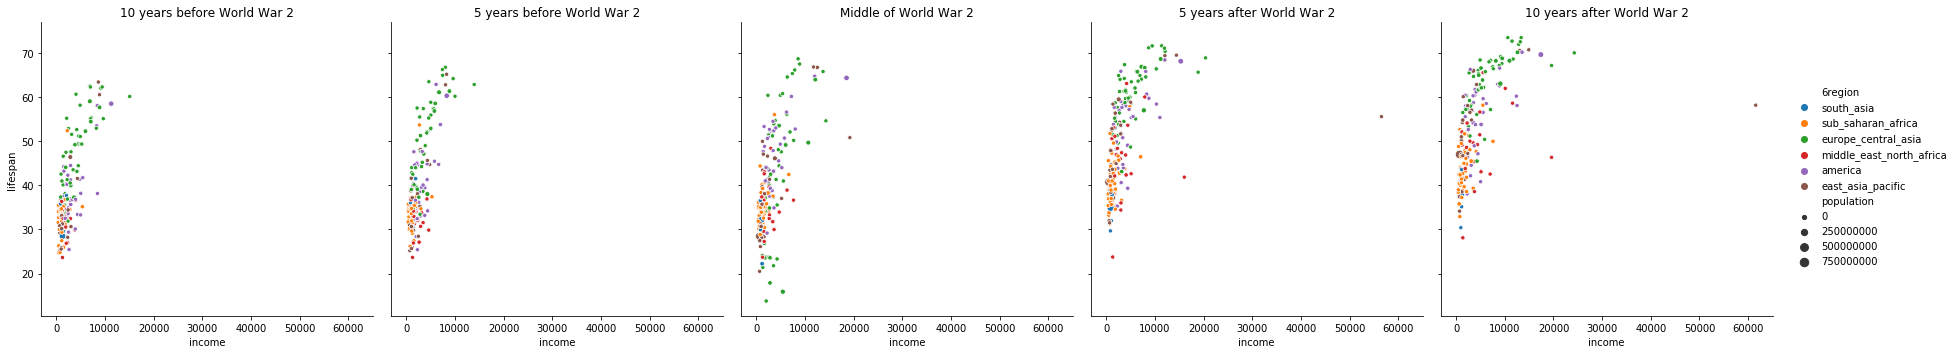

In [0]:
#lifespan/income 10 years before world war 2, 5 years before world war 2, during world war 2 (1943), 5 years after world war 2, 10 years after world war 2

year = [1929, 1934, 1943, 1950, 1955]
timescale = merged[merged.year.isin(year)]

fig = sns.relplot(x = 'income', y = 'lifespan', hue = '6region', size = 'population', col = 'year', data = timescale)
axes = fig.axes.flatten()
axes[0].set_title('10 years before World War 2')
axes[1].set_title('5 years before World War 2')
axes[2].set_title('Middle of World War 2')
axes[3].set_title('5 years after World War 2')
axes[4].set_title('10 years after World War 2')
plt.show()



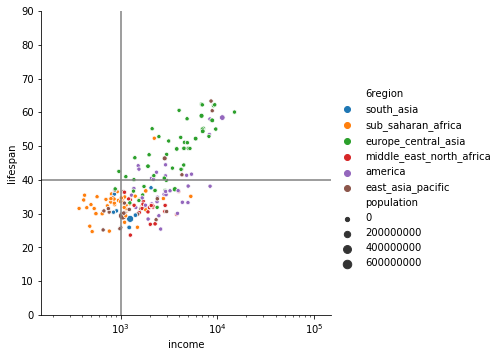

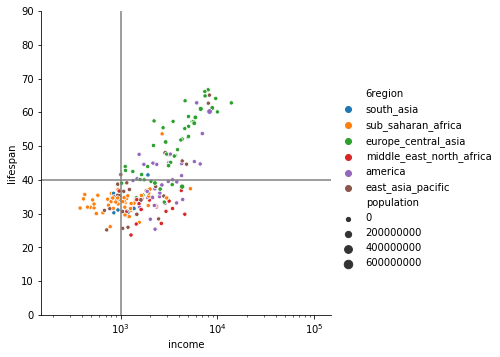

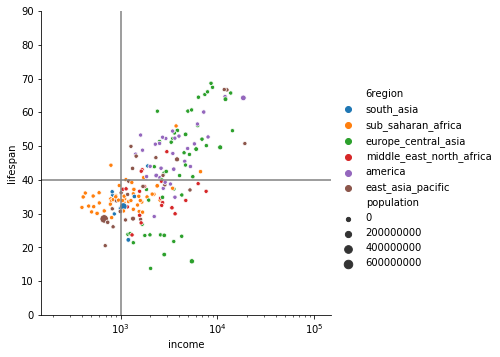

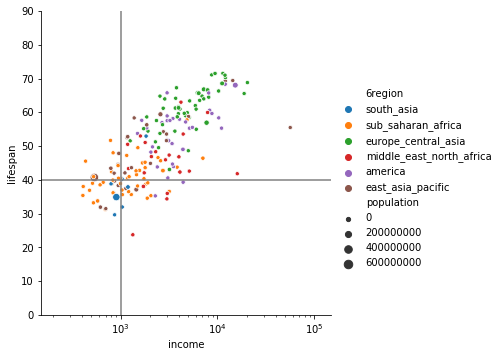

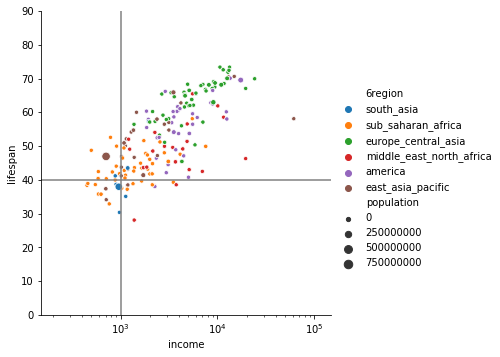

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO